# Определение критериев определяющиех успешность игры 

<div style="border:solid Chocolate 2px; padding: 40px">
    
    
**Описание проекта**
    
Имеются данные о работе интернет-магазина по продаже компьютерных игр. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Данные включают в себя игры до 2016. Дата на момент исследования - декабрь 2016 года и необходимо продумать кампанию на 2017 год.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<div style="border:solid Chocolate 2px; padding: 40px">
    
    
**Описание данных**
    
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB

<div style="border:solid Chocolate 2px; padding: 40px">
    
    
**План работы**
    
Шаг 1. Изучиние общуй информации

Шаг 2. Подготовка данных

Заменить названия столбцов (приведите к нижнему регистру);  
Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;  
Обработать пропуски при необходимости;  
Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;  
Описать причины, которые могли привести к пропускам;  
Разберать 'tbd' абривеотуру описать как  обработать;  
Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Проведите исследовательский анализ данных

Анализ периода выпуска игр
Анализ продаж по платформам
Строим прогноз на 2017 год
Анализ по глобальным продажам игр в разбивке по платформам
Анализ влияния на продажи внутри одной популярной платформы отзывы пользователей и критиков
Анализ по жанрам
    
Шаг 4. Составьте портрет пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Задайте самостоятельно пороговое значение alpha.

Шаг 6. Общий вывод






##  1. Загружаем данные и изучаем общую информацию

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [45]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df = 
display(df.sample(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2295,Burnout Revenge,PS2,"2,005.00",Racing,0.75,0.03,0.00,0.12,90.00,8.8,E10+
10339,Shrek: Forever After,X360,"2,010.00",Platform,0.10,0.00,0.00,0.01,62.00,6.2,E10+
9355,Retro Atari Classics,DS,"2,005.00",Misc,0.12,0.00,0.00,0.01,51.00,3.7,E
10015,Rugby 15,PS4,"2,015.00",Sports,0.04,0.06,0.00,0.02,19.00,3.4,E
16313,Bakumatsu Rock,PSP,"2,014.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
7579,NBA Live 14,XOne,"2,013.00",Sports,0.16,0.02,0.00,0.02,36.00,3.1,E
8350,Hellboy: The Science of Evil,PS3,"2,008.00",Action,0.13,0.02,0.00,0.02,47.00,6.1,T
5126,Imagine: Salon Stylist,DS,"2,009.00",Simulation,0.23,0.10,0.00,0.03,NaN,tbd,E
5513,Spy Kids 3-D: Game Over,GBA,"2,003.00",Platform,0.24,0.09,0.00,0.01,62.00,7.7,E
1902,Tom Clancy's Ghost Recon 2,PS2,"2,004.00",Shooter,0.64,0.34,0.00,0.10,58.00,6,T


In [46]:
df.info()
shape = df.shape
display(shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


(16715, 11)

In [47]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [48]:
df.isna().sum() 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [49]:
df.duplicated().sum() 

0

## 1. Вывод 

1. Данные выглядят объективно и понятно.
2. В названиях столбцов есть буквы как верхнего так и нижнего регистра, их нужно предобработать.
3. В столбцах Year_of_Release и User_Score надо поменять тип данных
4. Колонки: Year_of_Release, Critic_Score, User_Score, Rating содердат пропуски данных.
5. Дубликаты (полные) в данных отсутствуют.

## 2. Предобработка данных

### Замена названия столбцов 

In [50]:
df.columns = df.columns.str.lower()

df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E


### Преобразование типов данных

In [51]:
df['year_of_release'] = df['year_of_release'].astype('Int64') #меняем тип на целочисленный
#df['user_score'] = pd.to_numeric(df['user_score'])#меняем с object на float64

узнаем, что в данных есть значение tbd, что мешает изменению типа данных . Избавимся от tbd.

TBD — это аббревиатура, которая обозначает «To Be Determined» (англ. «будет определено»). Это выражение используется в различных областях и означает, что некоторые детали еще не известны или не определены.
В технической литературе и проектной документации TBD обычно используется для обозначения неопределенных деталей или решений в проекте.

In [52]:
for item in df['user_score']:
    if item == 'tbd':
        df.loc[df['user_score']=='tbd', 'user_score'] = -2
df['user_score'] = pd.to_numeric(df['user_score'])#меняем с object на float64

### Обработка пропусков

In [54]:
df.dropna(subset = ['name' ], inplace= True)
df.dropna(subset = ['genre'], inplace= True)
df = df.reset_index(drop=True)

Избавимся от пропусков в столбце 'year_of_release', так как данные стоставляют 1% и их удаление не помешает анализц а дальнейшем.

In [55]:
df.dropna(subset = ['year_of_release'], inplace= True)
df = df.reset_index(drop=True)

In [56]:
df['rating'] = df['rating'].fillna('not_defined')
df['rating'].value_counts()

not_defined    6676
E              3921
T              2905
M              1536
E10+           1393
EC                8
K-A               3
AO                1
RP                1
Name: rating, dtype: int64

In [57]:
df.isna().sum() 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

### Суммарные продажи 

In [58]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)  
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not_defined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not_defined,31.38


Найдем неявные дубликаты После чего закоментируем, что бы не отвлекаться на данные

In [59]:
new_df = df[['name','platform', 'year_of_release']]. copy ()


In [60]:
new_df[new_df.duplicated(keep=False)]

,name,platform,year_of_release
600,Madden NFL 13,PS3,2012
15969,Madden NFL 13,PS3,2012


In [61]:
df = df.drop (index= 15969 )

##  2. Вывод по предобработке данных

1. Заменили названия столбцов на нижний регистр.
2. Заменили тип данных в столбцах Year_of_Release и User_Score.
3. В столбце User_Score  заменили аббревиатуру 'tbd' на None.
4. В столбцах name, genre и year_of_release с помощью dropna, так как потеря этих строк не скажеться на дальнейщих результатах.
5. В столбце рейтинг rating пропуски заменили на 'not_defined', что бы пропуски не машали анализу и не потерять объем данных.
6. Не обрабатываю пропуски в столбцах critic_score	и  user_score, так как это может повлиять на последующий анализ.
7. Добавили столбец	total_sales.

## 3. Исследовательский анализ данных

### Анализируем сколько игр выпускалось в разные годы

In [62]:
amount_of_games = df.groupby('year_of_release')['name'].count().reset_index()
amount_of_games.columns = ['year', 'amount']
amount_of_games

,year,amount
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


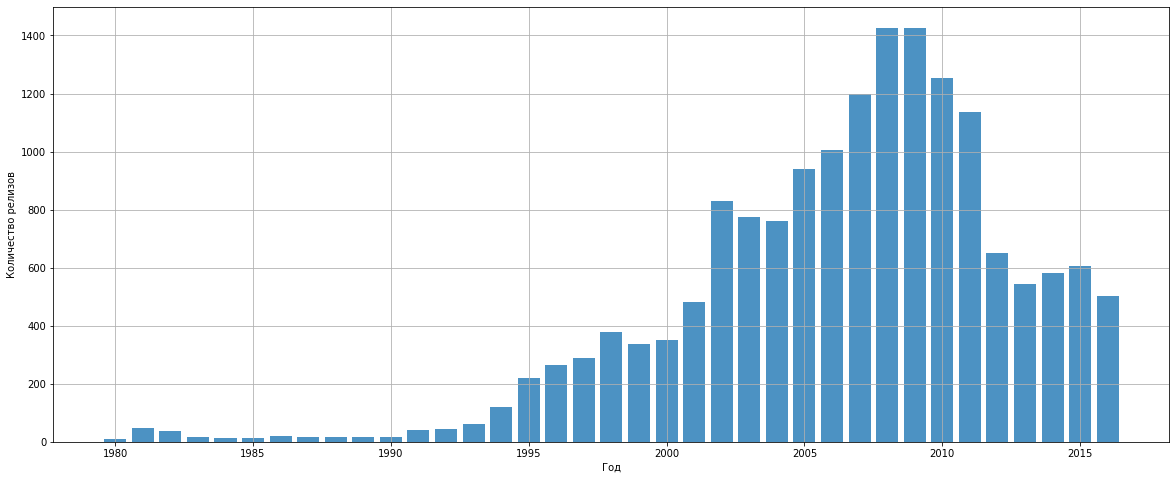

In [63]:
plt.figure(figsize=(20,8))
plt.bar(amount_of_games['year'], amount_of_games['amount'], label='Выпусков игр за год', alpha=0.8, width=0.8)
plt.xlabel('Год')
plt.ylabel('Количество релизов')
plt.grid()
plt.show()

#### Вывод
До 1995 года игры почти не выпускались, после этого с каждым годом количество выпускаемых игр всё росло вплоть до 2009 года. 2010-2011 падение выпуска игр. С 2012 после чего количество выпусков примерно одинаковое каждый год и колеблется от 500 до 650 игр в год.

### Анализируем как менялись продажи по платформам и определяем актуальный период для анализа

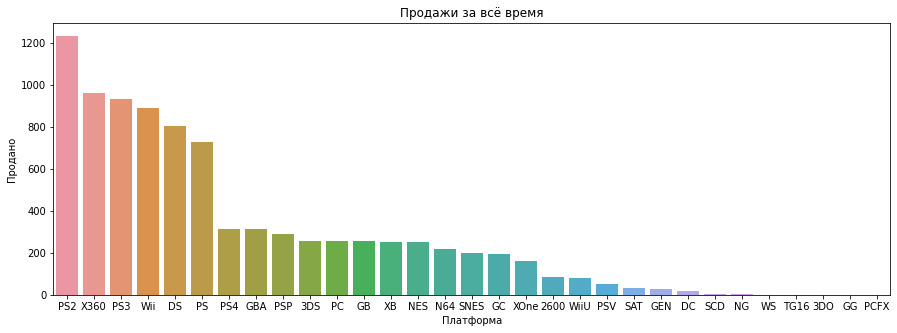

In [64]:
sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=sales.index,y=sales['total_sales'])
plt.title("Продажи за всё время")
plt.xlabel("Платформа")
plt.ylabel("Продано")
plt.show()

In [65]:
display(sales)

,total_sales
platform,
PS2,"1,233.56"
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


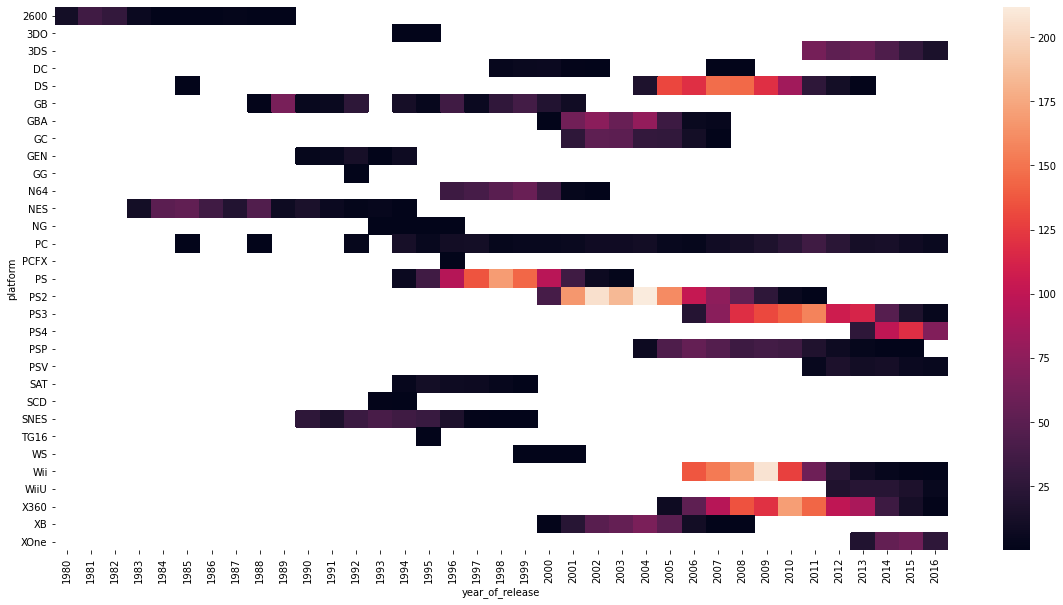

In [66]:
sales_by_platforms=df.pivot_table(index="platform",columns='year_of_release',values='total_sales',aggfunc=('sum'))
plt.figure(figsize=(20,10))
sns.heatmap(sales_by_platforms)
plt.show()

#### Вывод

1. Топ-6 платформ по продажам: PS2,X360,PS3,Wii,DS,PS(взяла 6, т.к. между 6 и 7 местом большой разрыв)
2. Платформы появляются-исчезают в срок примерно 10-12 лет(пик продаж обычно посередине)
3. PS2,PS3, PS4 выходят  и тогда падают продажи предыдущей версии. Аналогичная ситуация я у x-box и нинтендо.
4. DS, она же Nintendo DS перевыпускалась после первого провала, перезапуск вышел удачный.
5. PC как игровая платформа запускался очень медленно, с небольшим пиком но при этом "жизнь" пк как платформы для игр больше всех

###  Строим прогноз на 2017 год

Выберем для исследования последний период, когда количество выпускаемых игр в год стабилизировалось (с 2012 года )
Для прогноза на 2017 надо исключить платформы, переставшие существовать в этот период(PSP,DS)
Сделаем срез по заданным условиям и построим график  и тепловую карту

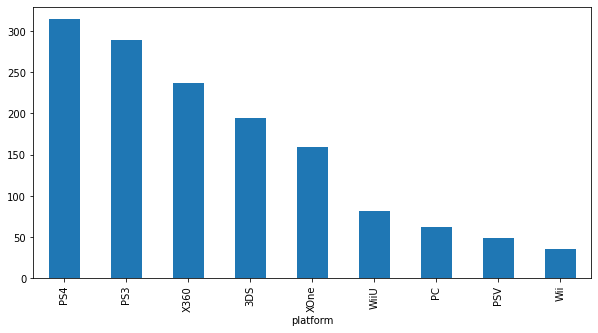

In [67]:
actual_df=df.query('year_of_release>=2012 and platform != ("PSP","DS")')
actual_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(figsize=(10,5),kind="bar")
plt.show()

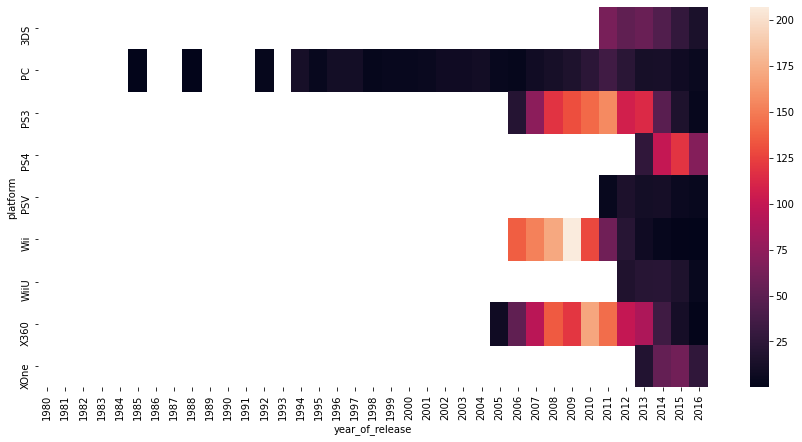

In [68]:
actual_platforms=['3DS','PS3','PS4','X360','XOne','WiiU','PC','PSV','Wii']
actual_platform=sales_by_platforms.query('platform in @actual_platforms') 
plt.figure(figsize=(15,7))
sns.heatmap(actual_platform)
plt.show()

#### Вывод

За актульный период (2012-2016):
1. 3DS,PS3,PSV,WiiU,X360 идут на спад
2. Потенциально прибыльные - PS4,XOne
3. PC-стабильна

### Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [69]:
# Сделаем срез из датасета с условием, что нам нужны только актуальные платформы и информация за актуальный период
actual_period = df.query('platform in @actual_platforms and year_of_release>=2012')
actual_period = df.query('platform in @actual_platforms and user_score!=-2')
actual_period.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.00,7.70,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.00,6.30,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.00,7.40,E,21.80
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

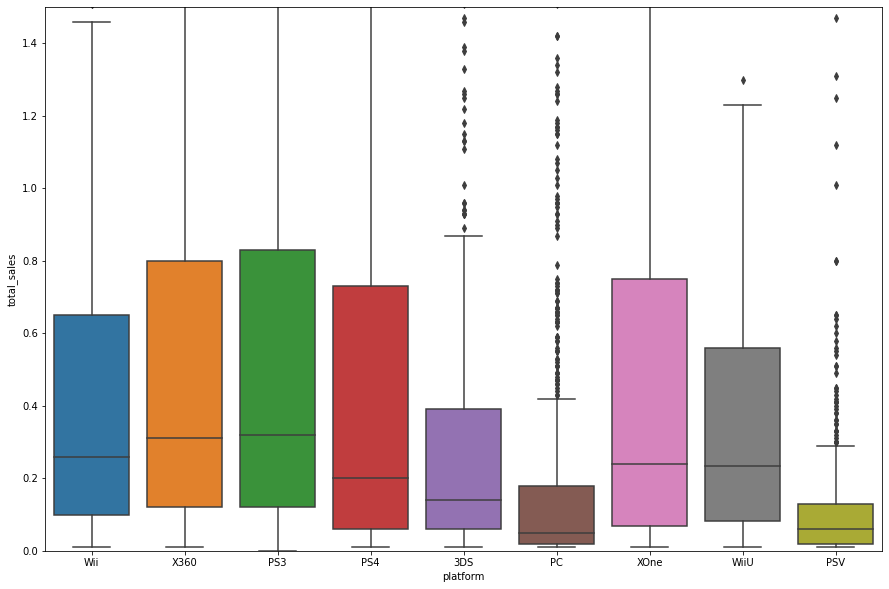

In [70]:
plt.figure(figsize=(15,10))
plt.ylim(0,1.5)
sns.boxplot(x='platform',y='total_sales',data=actual_period)

#### Вывод
Наиболее популярные платформы :WiiU, PS4, PS3, Xbox One, X360
Максимальное значение у платформы PS3, почти без отрыва от нее идет платформа X360. Медианное значение около 0,3.
Минимальное значение у платформы  PS4 и медианное значение равно 0,2.
Максимальный Межквартильный размах у платформы PS3 это говорит о том, чти по ней больше всего продаж.
Минимальные продажи из топ-5 у платформы WiiU.
Межквартериальный размах для первых топ-5 платформ лежит в размере  от 0,1 до 0.8 миллионов проданных копий.


### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Выберем для анализа платформы PS4 и XOne

Считаем зависимость между суммарными продажами и оценой критиков

0.4064685741971657

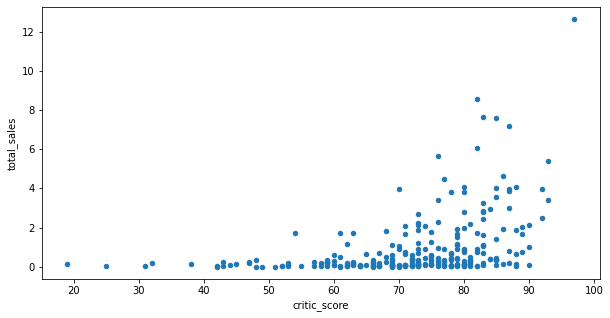

In [71]:
ps4_critic = actual_period.query('platform=="PS4"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,5))
ps4_cor = actual_period.query('platform=="PS4"')
ps4_cor['total_sales'].corr(ps4_cor['critic_score'])

0.41215586820316974

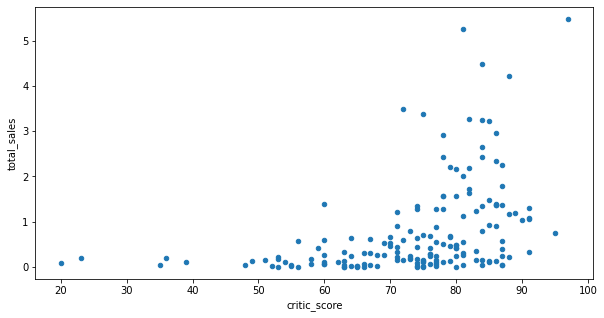

In [72]:
XOne_critic = actual_period.query('platform=="XOne"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,5))
XOne_cor = actual_period.query('platform=="XOne"')
XOne_cor['total_sales'].corr(XOne_cor['critic_score'])

-0.031957110204556376

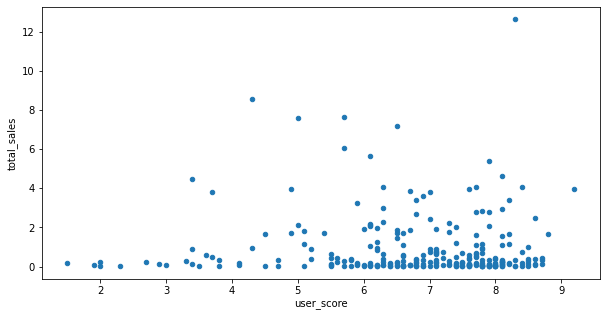

In [73]:
actual_period = df.query('platform in @actual_platforms and user_score!=-2')
ps4_users = actual_period.query('platform=="PS4"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,5))
ps4_cor['total_sales'].corr(ps4_cor['user_score'])

Считаем зависимость между суммарными продажами и оценой пользователей

-0.06892505328279412

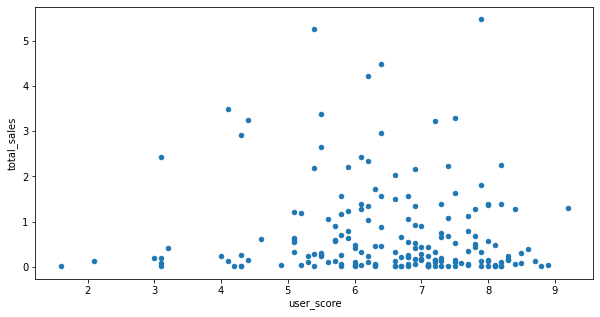

In [74]:
actual_period = df.query('platform in @actual_platforms and user_score!=-2')
XOne_users = actual_period.query('platform=="XOne"').sort_values(by=('user_score'),ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,5))
XOne_cor['total_sales'].corr(XOne_cor['user_score'])

#### Вывод

Зависимость количества продаж от оценки критиков слабая.
Зависимость продаж от оценки пользователей обратная и отсутствует.

Это можно объяснить тем, что оценка выставляется уже после того как продажа совершена. И тем что оценки выставляются пользователями и критиками спустя некоторое время использования продукта.

Чуть большая корреляция между продажами и оценками критиков, можно объяснить тем, что критики имеют нассмотренность и опыт, поэтому реже покупают заведомо неинтересный им продукт.

Оценки же пользователей опираются на меньший опыт и вероятно покупка осуществляется на основании рекламных компаний.

### Какие жанры самые прибыльные Какие жанры самые выпускаемые

Прибыльность игр

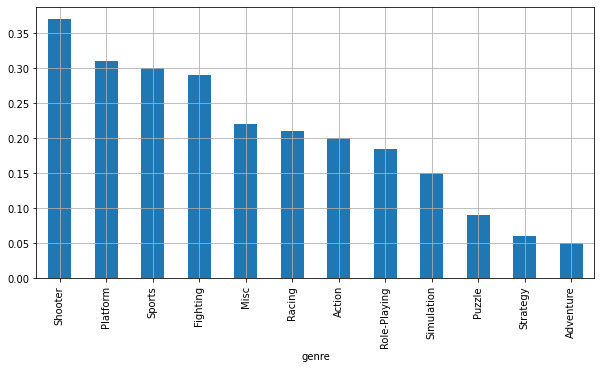

In [75]:
profitable_genre=actual_period.groupby('genre')['total_sales'].median().sort_values(ascending=False)
profitable_genre.plot(y='genre',grid=True,figsize=(10,5),kind='bar')
plt.show()

Выпускаемость игр

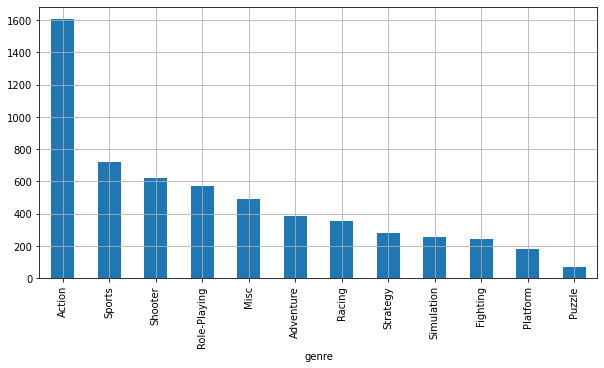

In [76]:
count_genre=actual_period.groupby('genre')['total_sales'].count().sort_values(ascending=False)
count_genre.plot(y='genre',grid=True,figsize=(10,5),kind='bar')
plt.show()

## 3. Вывод
Самые прибыльные игры жанра шутер. Видим большой отрыв от иных жанров в размере около 30%
Самый выпускаемый жанр - экшн. Видим большой  отрыв состаляющий примерно 2,5 порядка.
Экшены при относительно небольшой прибыльности по количеству выпускаемых игр самые популярные (т.е. прибыль за каждую игру небольшая)
Шутеры же в свою очередь неизменно пользуются интересом у пользователей, но компании не выпускают их в большом количестве.

## 4. Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [77]:
places = ['na_sales',
          'eu_sales',
          'jp_sales',
          'other_sales']
place_name = ['Северной Америке',
              'Европе',
              'Японии', 
              'других странах']
for_visualize=pd.DataFrame()
for place in places:
    print('Топ 5 платформ в', place_name[places.index(place)],':')
    data_local=df.groupby(
        'platform'
    )[place].sum().sort_values().sort_values(ascending=False)
    result = data_local[:5] / data_local.sum() * 100
    print(result)
    for_visualize = pd.merge(for_visualize, result, how='outer',
                             left_index=True, right_index=True)
    print('=' * 20, end='\n\n')

Топ 5 платформ в Северной Америке :
platform
X360   13.72
PS2    13.20
Wii    11.21
PS3     8.99
DS      8.76
Name: na_sales, dtype: float64

Топ 5 платформ в Европе :
platform
PS2    13.86
PS3    13.64
X360   11.18
Wii    10.76
PS      8.85
Name: eu_sales, dtype: float64

Топ 5 платформ в Японии :
platform
DS     13.56
PS     10.83
PS2    10.66
SNES    9.03
3DS     7.80
Name: jp_sales, dtype: float64

Топ 5 платформ в других странах :
platform
PS2    24.34
PS3    17.20
X360   10.85
Wii     9.93
DS      7.54
Name: other_sales, dtype: float64



In [78]:
for_visualize

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,NaN,NaN,7.80,NaN
DS,8.76,NaN,13.56,7.54
PS,NaN,8.85,10.83,NaN
PS2,13.20,13.86,10.66,24.34
PS3,8.99,13.64,NaN,17.20
SNES,NaN,NaN,9.03,NaN
Wii,11.21,10.76,NaN,9.93
X360,13.72,11.18,NaN,10.85


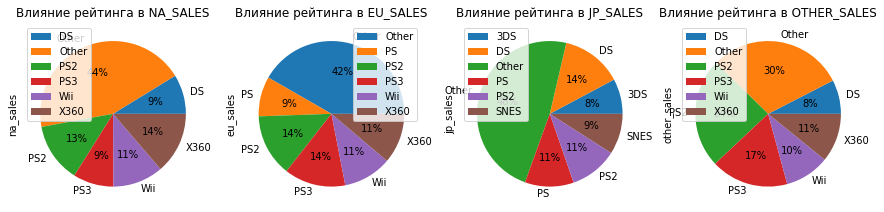

In [79]:
plt.subplots(figsize=(15,5)) #сетка для отрисковки графиков
places = ['na_sales',
          'eu_sales',
          'jp_sales',
          'other_sales']
for i, region in enumerate (places):
             column_name = '{}'.format(region)
             current=df.groupby('platform').agg({column_name: 'sum'}).reset_index()
             current['rank']=current[column_name].rank(method='dense', ascending=False)
             current.loc[current['rank']>5, 'platform'] = 'Other'
             current=current.groupby('platform').agg({column_name: 'sum'})
             current.plot(y=column_name, autopct='%1.0f%%', kind='pie', ax= plt.subplot(1, len(places), i+1))
             plt.title('Влияние рейтинга в {}'.format(region.upper()))


#### Вывод
Как видно из графиков, люди в Северной Америке и в Европе используют платформы одного поколения, они лишь немного отличаются в процентном соотношении (В Америке предпочитают Xbox360, а в Европе PS2 и PS3). Ситуация в остальном похожа на ситуацию в Европе и Америке, за тем лишь исключением, Отличаеться большем процентом по PS2. В японии лидирует DS портативная игровая консоль, почти так же как и во всем мире популярна PS2.

Люди во всём мире (кроме Японии) отдают предпочтение стационарным консолям перед портативными В японии ситуация несколько иная. Там люди предпочитают играть на  DS игнорируя при этом Xbox 360. 

### Самые популярные жанры (топ-5)

In [80]:
places = ['na_sales',
          'eu_sales',
          'jp_sales',
          'other_sales']
place_name = ['Северной Америке',
              'Европе',
              'Японии',
              'других странах']
for_visualize = pd.DataFrame()
for place in places:
    print('Топ 5 жанров в', place_name[places.index(place)],':')
    data_local=df.groupby(
        'genre'
    )[place].sum().sort_values().sort_values(ascending=False)
    result = data_local[:5] / data_local.sum() * 100
    print(result)
    for_visualize = pd.merge(for_visualize, result, how='outer',
                             left_index=True, right_index=True)
    print('=' * 20, end='\n\n')

Топ 5 жанров в Северной Америке :
genre
Action     19.88
Sports     15.46
Shooter    13.47
Platform   10.24
Misc        9.20
Name: na_sales, dtype: float64

Топ 5 жанров в Европе :
genre
Action    21.29
Sports    15.47
Shooter   13.11
Racing     9.77
Misc       8.78
Name: eu_sales, dtype: float64

Топ 5 жанров в Японии :
genre
Role-Playing   27.38
Action         12.41
Sports         10.45
Platform       10.13
Misc            8.29
Name: jp_sales, dtype: float64

Топ 5 жанров в других странах :
genre
Action    23.28
Sports    16.89
Shooter   13.20
Racing     9.65
Misc       9.34
Name: other_sales, dtype: float64



In [81]:
for_visualize

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,19.88,21.29,12.41,23.28
Misc,9.20,8.78,8.29,9.34
Platform,10.24,NaN,10.13,NaN
Racing,NaN,9.77,NaN,9.65
Role-Playing,NaN,NaN,27.38,NaN
Shooter,13.47,13.11,NaN,13.20
Sports,15.46,15.47,10.45,16.89


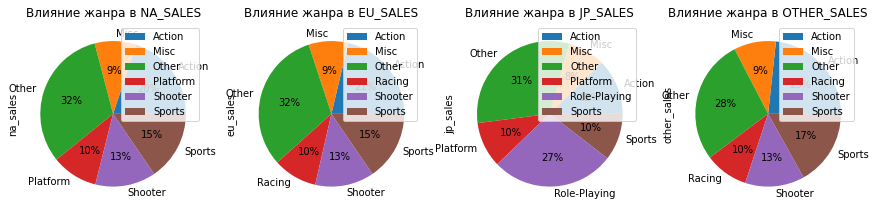

In [82]:
plt.subplots(figsize=(15,5)) #сетка для отрисковки графиков
places = ['na_sales',
          'eu_sales',
          'jp_sales',
          'other_sales']
for i, region in enumerate (places):
             column_name = '{}'.format(region)
             current=df.groupby('genre').agg({column_name: 'sum'}).reset_index()
             current['rank']=current[column_name].rank(method='dense', ascending=False)
             current.loc[current['rank']>5, 'genre'] = 'Other'
             current=current.groupby('genre').agg({column_name: 'sum'})
             current.plot(y=column_name, autopct='%1.0f%%',  kind='pie', ax= plt.subplot(1, len(places), i+1))
             plt.title('Влияние жанра в {}'.format(region.upper()))

#### Вывод
Во всех странах, кроме Японии люди любят поиграть в Shooter, Action и Sports.
В категорию Action игр преимущественно попадают самые топовые игры, поэтому неудивительно, что данный жанр нравится людям из всех стран. Игры в стиле RPG больше всего приглянулись японцам, а вот в Европе пользователи к ним равнодушны. Это объясняется тем, что RPG чаще выходят на портотивных консолях и, как было показано на графиках выше, именно в Японии их и предпочитают.
Япония отличаеться от всех стран. Больше всего в японии любят Role-Playing и Action.
Так же Sports и Platform имеет чуть меньшую популярность, но входят в ТОП в Японии.
В японии люди не играют в шутеры.


### Рейтинг

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет
«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

In [83]:
na_ESRB=actual_df.pivot_table(index='rating',values=['na_sales'],aggfunc=('sum'))
na_ESRB=na_ESRB.sort_values(by='na_sales',ascending=False)
na_ESRB=na_ESRB.reset_index()
display(na_ESRB)

jp_ESRB=actual_df.pivot_table(index='rating',values=['jp_sales'],aggfunc=('sum'))
jp_ESRB=jp_ESRB.sort_values(by='jp_sales',ascending=False)
jp_ESRB=jp_ESRB.reset_index()
display(jp_ESRB)

eu_ESRB=actual_df.pivot_table(index='rating',values=['eu_sales'],aggfunc=('sum'))
eu_ESRB=eu_ESRB.sort_values(by='eu_sales',ascending=False)
eu_ESRB=eu_ESRB.reset_index()
display(eu_ESRB)

other_ESRB=actual_df.pivot_table(index='rating',values=['other_sales'],aggfunc=('sum'))
other_ESRB=other_ESRB.sort_values(by='other_sales',ascending=False)
other_ESRB=other_ESRB.reset_index()
display(other_ESRB)

,rating,na_sales
0,M,231.57
1,E,113.44
2,not_defined,100.13
3,E10+,75.09
4,T,66.02


,rating,jp_sales
0,not_defined,95.62
1,E,27.62
2,T,25.76
3,M,21.20
4,E10+,8.19


,rating,eu_sales
0,M,193.96
1,E,111.78
2,not_defined,89.32
3,E10+,54.84
4,T,52.96


,rating,other_sales
0,M,63.38
1,E,31.13
2,not_defined,26.70
3,T,17.94
4,E10+,16.13


#### Вывод
Во всех регионах кроме Японии первые 2 места по возрастному рейтингу занимают игры 17+ и 6+, в Японии первые места у игр 6+ и 13+. Еще много игр с неопределенным рейтингом. Отличие Японии от других стран можно объяснить тем, что шутеры и экшены которые занимают лидирующие позиции в других регионах обычно имеют ретинг 17+ из-за жестоких сцен и сцен насилия. Итог - я считаю, что рейтинг не влияет на продажи игр

## 5. Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза:

H0 = "Средние пользовательские рейтинги платформ Xbox One и PC равны",

Альтернативная гипотеза:

H1 = "Средние пользовательские рейтинги платформ Xbox One и PC не равны"

Критический уровень статистической значимости alpha  = 0.05

In [84]:
actual_df.dropna(subset = ['user_score'], inplace= True) #+удаляю строки с nan, т.к. тогда и в pvalue будет nan
actual_df = actual_df.reset_index(drop=True)

/tmp/ipykernel_31/24037535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_df.dropna(subset = ['user_score'], inplace= True) #+удаляю строки с nan, т.к. тогда и в pvalue будет nan


In [85]:
alpha = .05 # критический уровень статистической значимости

XboxOne=actual_df.query('platform=="XOne"')['user_score']
PC=actual_df.query('platform=="PC"')['user_score']

results = stats.ttest_ind(XboxOne, PC, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.3866769962990103
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC равны

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза:

H0 = "Средние пользовательские рейтинги жанров Action и Sports равны",

Альтернативная гипотеза:

H1 = "Средние пользовательские рейтинги жанров Action и Sports не равны"

Критический уровень статистической значимости alpha  = 0.05

In [86]:
alpha = .05 # критический уровень статистической значимости

Action=actual_df.query('genre=="Action"')['user_score']
Sports=actual_df.query('genre=="Sports"')['user_score']

results = stats.ttest_ind(Action, Sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0909972366118635e-08
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action  и Sports  разные

## 6. Общий вывод

Исходные данные представляют собой двумерную таблицу с 16715 записями и 11 признаками (столбцами). При первоначальном анализе было обнаружено больше количество пропусков в столбцах с рейнигом, годом издания игры, оценками критиков и оценками пользователей.  

Был проведен анализ исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах. По результатам проведенной предобработки данных были изменены названия столбцов, приведены к нужным типы данных и обработаны пропуски. После этого провели исследовательский анализ по результатам которого выяснили:

самые популярные платформы на данный момент - PS3,PS4,X360,3DS,XOne
самые прибыльные игры жанра шутер
самый выпускаемый жанр - экшн
портрет пользователя почти везде схож кроме Японии
рейтинг ESRB не влияет на продажи игр
самой перспективной в будущие годы будет приставка Playstation_4(рядом с ней будет Xbox_one) и можно предпологать в районе 2019-2020 года выпуск новых версий этих приставок


В различные года на рынке доминировали различные платформы, но набольшие продажи за всё время показала PS2. Как было выяснено из анализа распределения продаж игр на различных платформах по годам, медианное время жизни платформы составляет 10 лет, однако из графиков видно, что портативные консоли живут меньше (примерно в 2 раза).

В различные годы пользователей предпочитали различные платформы, но в период с 2007 по 2016 пользователей в большей степени интересовали Wii (2007-2009), Xbox 360 (2010), PS3 (2011-2013), PS4(2014-2016). При анализе продаж на различные платформы было выяснено, что хоть разброс значений у различных платформ и сильно отличается (игровые индустрии выпускают хиты для отдельных платформ) средние значения для всех платформ почти одинаковые: 250 тыс для стационарных консолей и 125 тыс для портативных и ПК

При анализе корреляции между оценками и продажами было выяснено, оценки пользователей вообще не коррелируют с продажами, а оценки критиков иммеют очень слабую корреляцию, что также является недостаточным для составления рекламной кампании.

Из года в год самыми популярными жанрами остаются игры в жанрах Action, Shooter и RPG.

Портрет пользователей для различных регионов имеет преимущественно одинаковый вид для всего мира. Однако в Японии люди склонны играть на портативных консолях и поэтому для них характерным жанром игр является RPG и именно японцы предпочитают игры для Teen в большей степени, по сравнению с остальным миром.

При анализе гипотез было выяснено, что оценки пользователей для платформ Xbox One и PC одинаковы, но при этом оценки для разных игровых жанров у пользователей отличаются.

самые популярные платформы на данный момент - PS3,PS4,X360,3DS,XOne
самые прибыльные игры жанра шутер
самый выпускаемый жанр - экшн
портрет пользователя почти везде схож кроме Японии
рейтинг ESRB не влияет на продажи игр
самой перспективной в будущие годы будет приставка Playstation_4(рядом с ней будет Xbox_one) и можно предпологать в районе 2019-2020 года выпуск новых версий этих приставок

Рекламную кампанию надо планировать с упором на Playstation_4 и Xbox_one